In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('default_credit_card.xls', header=None)

# Check the first few rows
print("First few rows before dropping:")
print(df.head())

# Drop the first row if it contains column names like X1, X2, ...
if df.iloc[0, 0] == 'ID':
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    df.reset_index(drop=True, inplace=True)

# Rename column "default payment next month" to "default"
df.rename(columns={'default payment next month': 'default'}, inplace=True)

# Convert all column names to string
df.columns = df.columns.astype(str)

# Display structure
print("\nData Types and Shape:")
print(df.dtypes)
print("\nShape of dataset:", df.shape)

# Show the cleaned top 5 rows
print("\nCleaned dataset preview:")
print(df.head())


First few rows before dropping:
   0          1    2          3         4    5      6      7      8      9   \
0  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1   1      20000    2          2         1   24      2      2     -1     -1   
2   2     120000    2          2         2   26     -1      2      0      0   
3   3      90000    2          2         2   34      0      0      0      0   
4   4      50000    2          2         1   37      0      0      0      0   

   ...         15         16         17        18        19        20  \
0  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1  ...          0          0          0         0       689         0   
2  ...       3272       3455       3261         0      1000      1000   
3  ...      14331      14948      15549      1518      1500      1000   
4  ...      28314      28959      29547      2000      2019      1200   

         21        22        23                       

In [2]:
df = df.drop(columns=['ID'])
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
# Check missing values
df.isnull().sum()



0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [5]:
df.duplicated().sum()

35

In [6]:
# Drop duplicates
df = df.drop_duplicates()


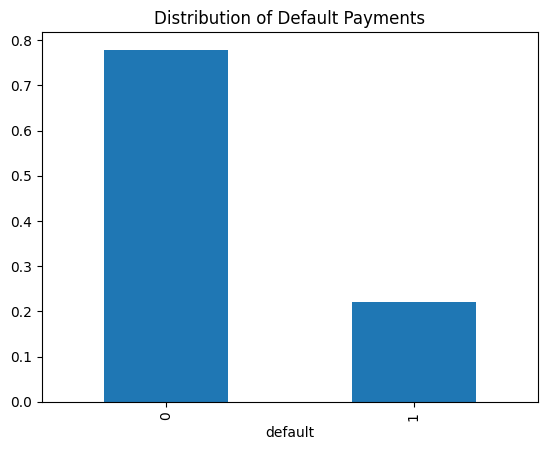

In [7]:
# Check the distribution of the target variable
df['default'].value_counts(normalize=True).plot(kind='bar', title='Distribution of Default Payments')
import matplotlib.pyplot as plt
plt.show()

In [13]:
df.to_csv('cleaned_data_before_FE_standerd.csv', index=False)

In [9]:
# Feature Engineering
df['Total_Bill_Amt'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)
df['Total_Pay_Amt'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis=1)
df['Avg_Pay_Delay'] = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)

In [10]:
# Drop the original columns used in feature engineering
df.drop(columns=[
    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
    'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'
], inplace=True)

In [11]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default,Total_Bill_Amt,Total_Pay_Amt,Avg_Pay_Delay
0,20000,2,2,1,24,1,7704,689,-0.333333
1,120000,2,2,2,26,1,17077,5000,0.5
2,90000,2,2,2,34,0,101653,11018,0.0
3,50000,2,2,1,37,0,231334,8388,0.0
4,50000,1,2,1,57,0,109339,59049,-0.333333


In [12]:
df['SEX'] = df['SEX'].map({1: 0, 2: 1})  # 0 = male, 1 = female


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default,Total_Bill_Amt,Total_Pay_Amt,Avg_Pay_Delay
0,20000,1,2,1,24,1,7704,689,-0.333333
1,120000,1,2,2,26,1,17077,5000,0.5
2,90000,1,2,2,34,0,101653,11018,0.0
3,50000,1,2,1,37,0,231334,8388,0.0
4,50000,0,2,1,57,0,109339,59049,-0.333333


In [26]:
import numpy as np
# Selecting only numerical columns
numerical_cols = ['LIMIT_BAL', 'AGE', 'Total_Bill_Amt', 'Total_Pay_Amt', 'Avg_Pay_Delay']

# Calculate z-scores
z_scores = np.abs(df[numerical_cols].apply(lambda x: (x - x.mean()) / x.std()))

# Detect outliers (z > 3 is a common threshold)
outliers = (z_scores > 3)
outlier_counts = outliers.sum()
print("Outliers per column:\n", outlier_counts)

Outliers per column:
 0
LIMIT_BAL         130
AGE               141
Total_Bill_Amt    659
Total_Pay_Amt     507
Avg_Pay_Delay     204
dtype: int64


In [25]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# Columns with outliers
cols_with_outliers = ['LIMIT_BAL', 'AGE', 'Total_Bill_Amt', 'Total_Pay_Amt', 'Avg_Pay_Delay']

# Copy your DataFrame to avoid changing original
df_cleaned = df_balanced.copy()

# IQR Method for Outlier Detection and Winsorization
for col in cols_with_outliers:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Optional: Print IQR boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}")

    # Apply Winsorization (1% and 99% caps)
    df_cleaned[col] = winsorize(df_cleaned[col], limits=[0.01, 0.01])

print("✅ Outliers handled successfully using Winsorization.")


LIMIT_BAL: Lower = -3.20, Upper = 3.13
AGE: Lower = -2.98, Upper = 2.97
Total_Bill_Amt: Lower = -2.03, Upper = 1.64
Total_Pay_Amt: Lower = -2.05, Upper = 2.11
Avg_Pay_Delay: Lower = -2.28, Upper = 2.20
✅ Outliers handled successfully using Winsorization.


In [28]:
import numpy as np

# Use the cleaned DataFrame
numerical_cols = ['LIMIT_BAL', 'AGE', 'Total_Bill_Amt', 'Total_Pay_Amt', 'Avg_Pay_Delay']

# Calculate z-scores on cleaned data
z_scores_after = np.abs(df_cleaned[numerical_cols].apply(lambda x: (x - x.mean()) / x.std()))

# Count outliers again
outliers_after = (z_scores_after > 3)
outlier_counts_after = outliers_after.sum()
print("Remaining Outliers per column (Z-score > 3):\n", outlier_counts_after)


Remaining Outliers per column (Z-score > 3):
 0
LIMIT_BAL            0
AGE                  0
Total_Bill_Amt    1109
Total_Pay_Amt        0
Avg_Pay_Delay        0
dtype: int64


In [ ]:
# Standardization for numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols = ['LIMIT_BAL', 'AGE', 'Total_Bill_Amt', 'Total_Pay_Amt', 'Avg_Pay_Delay']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default,Total_Bill_Amt,Total_Pay_Amt,Avg_Pay_Delay
0,-1.136285,1,2,1,-1.246078,1,-0.691829,-0.521733,-0.160161
1,-0.365619,1,2,2,-1.029141,1,-0.664666,-0.449585,0.682233
2,-0.596819,1,2,2,-0.161397,0,-0.444445,-0.347912,0.184581
3,-0.905085,1,2,1,0.164007,0,-0.108274,-0.392120,0.184581
4,-0.905085,0,2,1,2.333368,0,-0.417187,0.329134,-0.156028


In [15]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default,Total_Bill_Amt,Total_Pay_Amt,Avg_Pay_Delay
0,20000,1,2,1,24,1,7704,689,-0.333333
1,120000,1,2,2,26,1,17077,5000,0.5
2,90000,1,2,2,34,0,101653,11018,0.0
3,50000,1,2,1,37,0,231334,8388,0.0
4,50000,0,2,1,57,0,109339,59049,-0.333333


In [17]:
# Ensure y is defined as the target column
X = df.drop(columns=['default'])
y = df['default'].astype(int)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [18]:
# Combine features and target
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['default'] = y_resampled

In [ ]:
# Combine features and target
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['default'] = y_resampled

# Save to CSV
df_balanced.to_csv('balanced_data.csv', index=False)


<Axes: title={'center': 'Balanced Distribution of Default Payments'}, xlabel='default'>

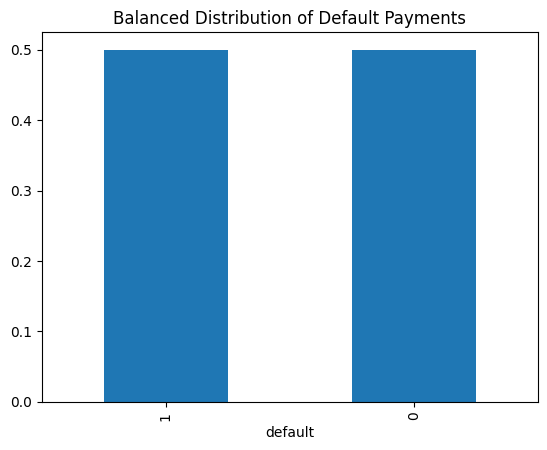

In [24]:
df_balanced['default'].value_counts(normalize=True).plot(kind='bar', title='Balanced Distribution of Default Payments')

# Exploratory Data Analysis

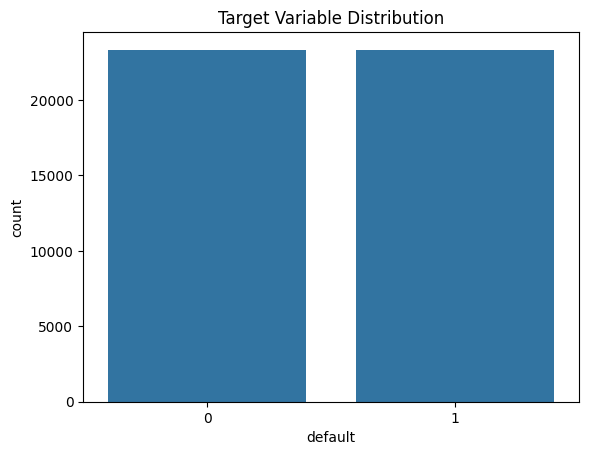

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.countplot(data=df_balanced, x='default')
plt.title("Target Variable Distribution")
plt.show()


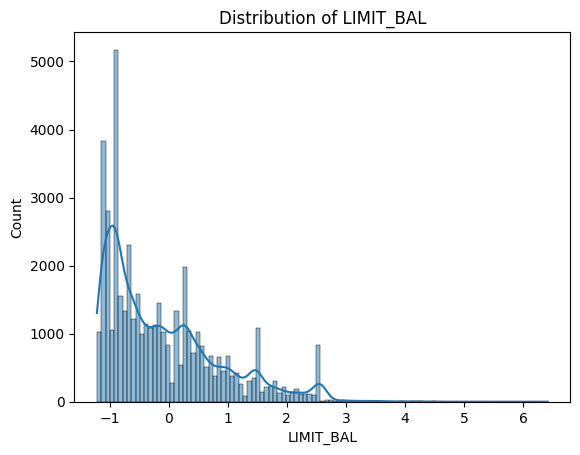

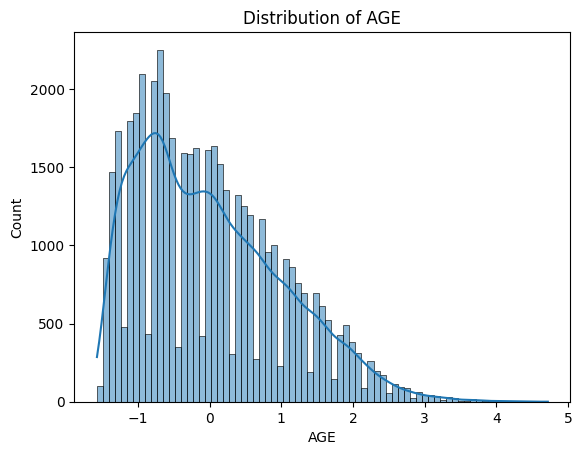

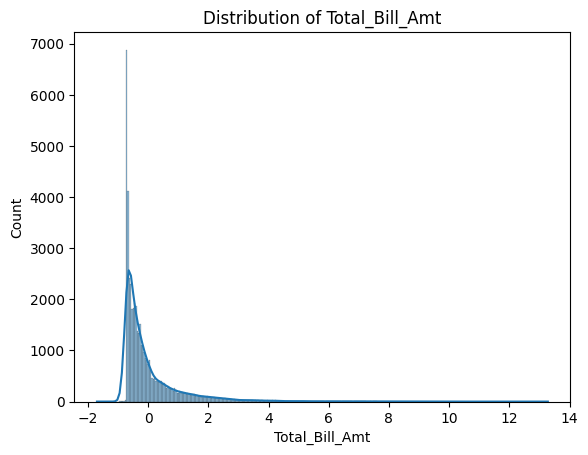

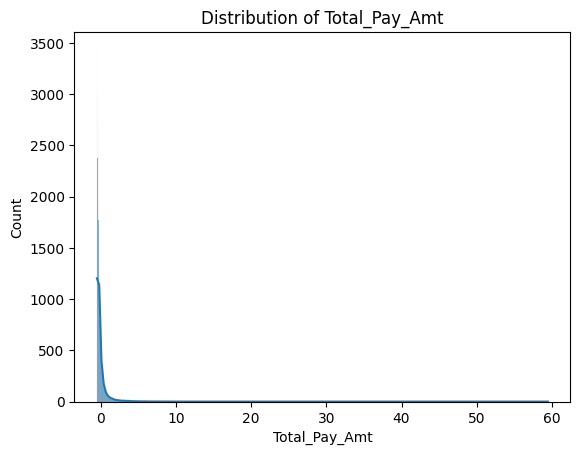

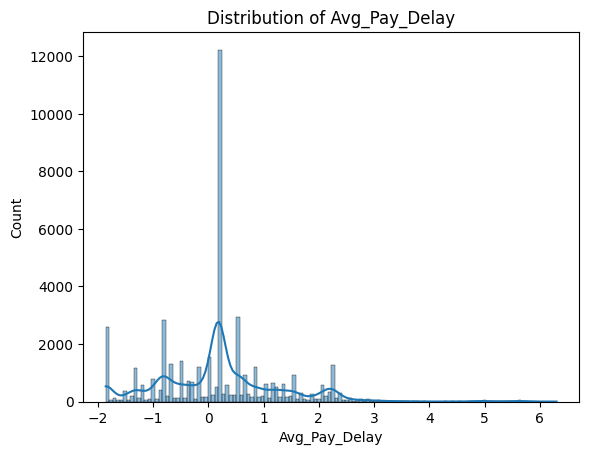

In [ ]:
cols = ['LIMIT_BAL', 'AGE', 'Total_Bill_Amt', 'Total_Pay_Amt', 'Avg_Pay_Delay']

for col in cols:
    sns.histplot(df_balanced[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [20]:
from sklearn.preprocessing import PowerTransformer

cols = ['LIMIT_BAL', 'AGE', 'Total_Bill_Amt', 'Total_Pay_Amt', 'Avg_Pay_Delay']
pt = PowerTransformer(method='yeo-johnson')
df_balanced[cols] = pt.fit_transform(df_balanced[cols])


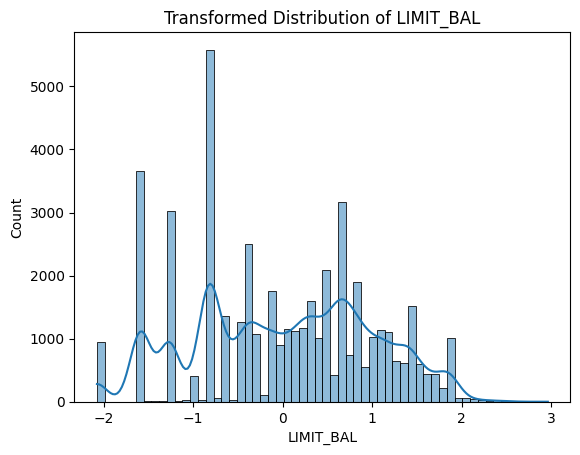

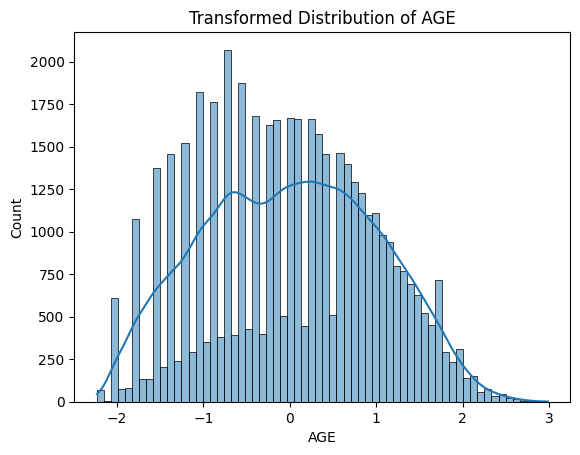

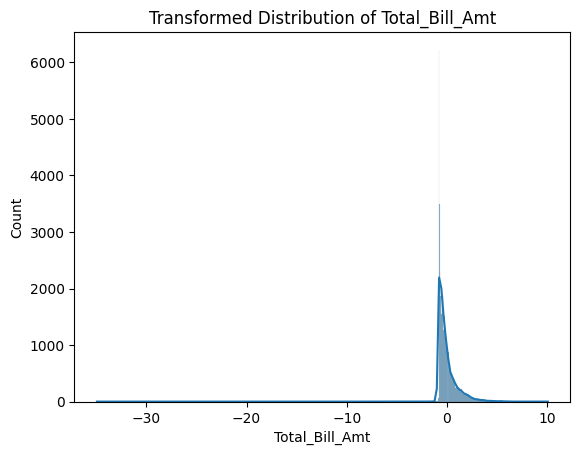

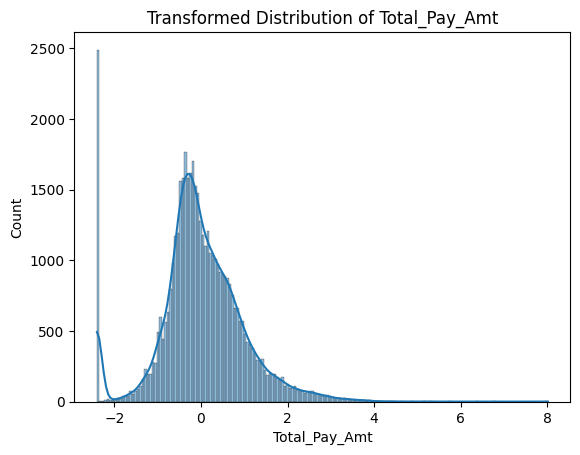

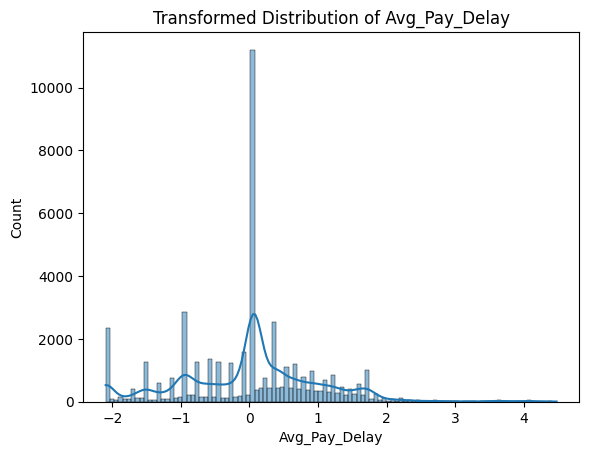

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

for col in cols:
    sns.histplot(df_balanced[col], kde=True)
    plt.title(f"Transformed Distribution of {col}")
    plt.show()


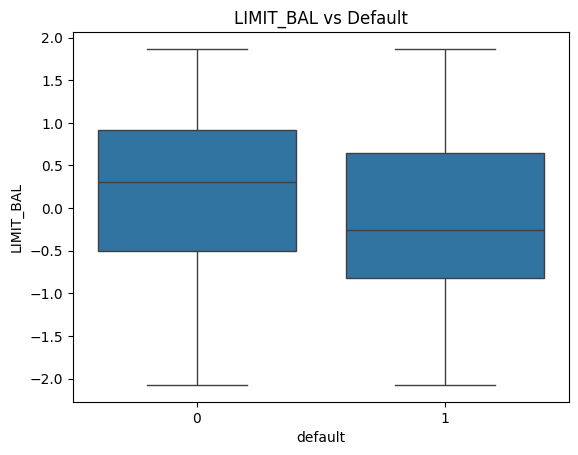

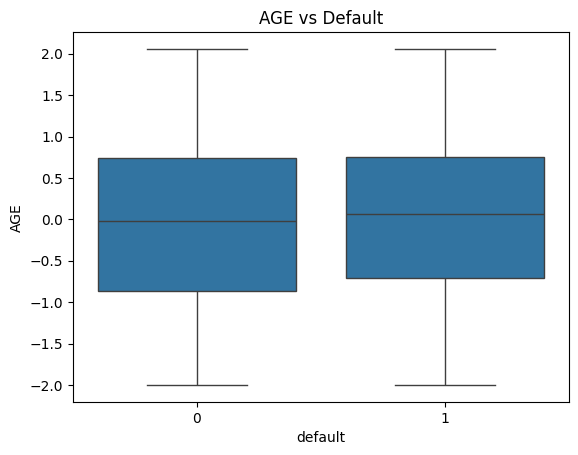

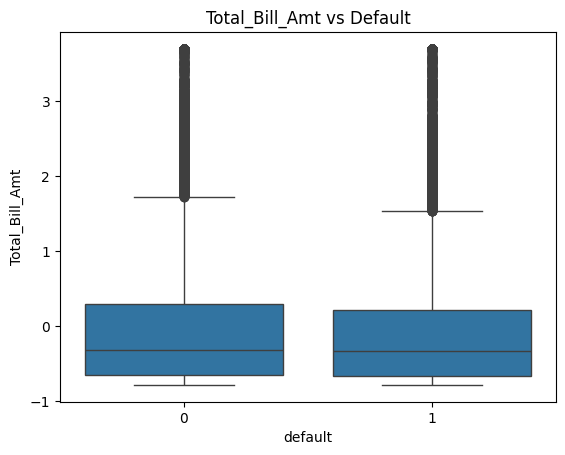

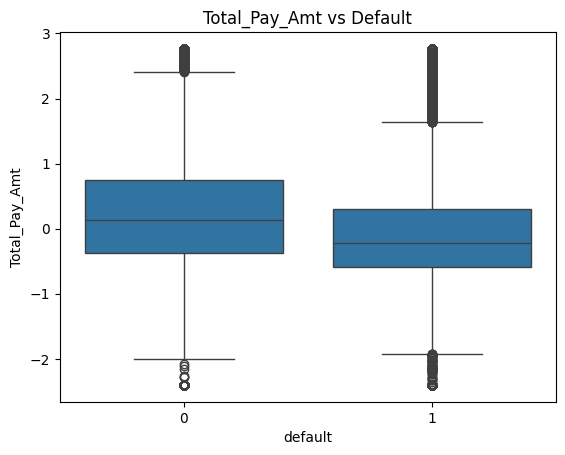

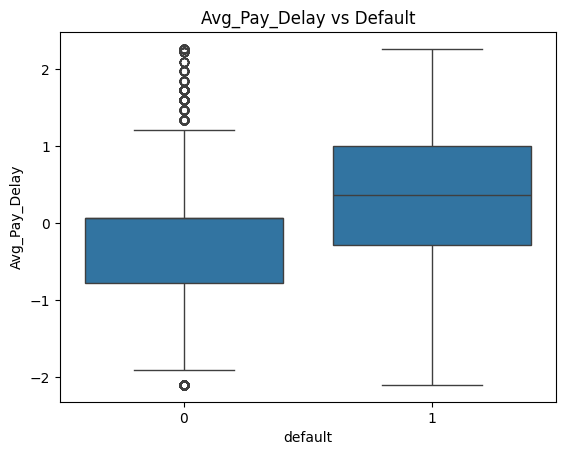

In [29]:
for col in cols:
    sns.boxplot(data=df_cleaned, x='default', y=col)
    plt.title(f"{col} vs Default")
    plt.show()


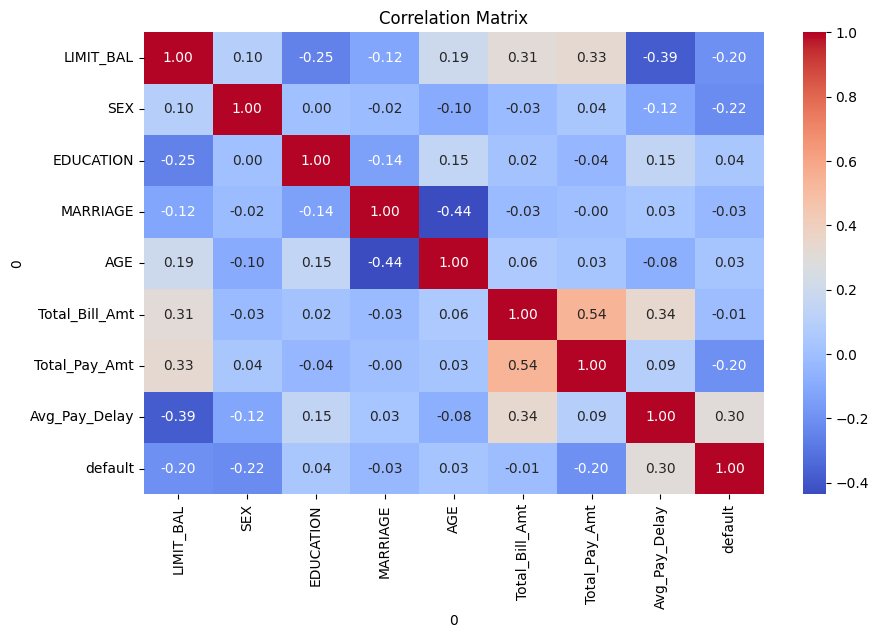

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [31]:
df_cleaned.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Total_Bill_Amt,Total_Pay_Amt,Avg_Pay_Delay,default
0,-1.586358,1,2.0,1.0,-1.576696,-0.737629,-1.387769,-0.259878,1
1,0.051520,1,2.0,2.0,-1.200007,-0.696890,-0.587165,0.518803,1
2,-0.253976,1,2.0,2.0,-0.017189,-0.401762,-0.140740,0.065568,0
3,-0.824435,1,2.0,1.0,0.331144,-0.018670,-0.304821,0.065568,0
4,-0.824435,0,2.0,1.0,1.941482,-0.377571,1.154927,-0.259878,0


# PCA (Principal Component Analysis)

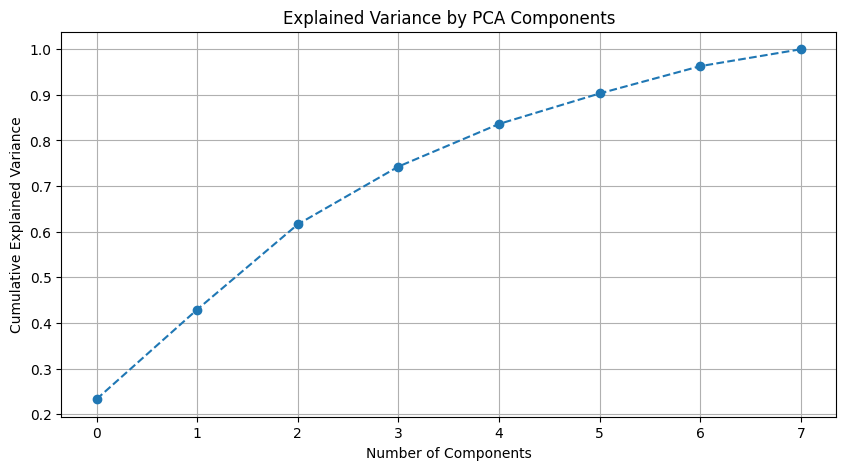

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA - Let's try with all components first
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Model Training

In [32]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_cleaned.drop("default", axis=1)
y = df_cleaned["default"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


### Using Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)

# Predict on test data
y_pred = log_model.predict(X_test_pca)
y_proba = log_model.predict_proba(X_test_pca)[:, 1]  # Probabilities for ROC AUC

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[3209 1458]
 [1584 3083]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      4667
           1       0.68      0.66      0.67      4667

    accuracy                           0.67      9334
   macro avg       0.67      0.67      0.67      9334
weighted avg       0.67      0.67      0.67      9334

ROC AUC Score: 0.7322139605963741


### Using Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_pca)
y_proba_rf = rf_model.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
 [[3852  815]
 [1037 3630]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      4667
           1       0.82      0.78      0.80      4667

    accuracy                           0.80      9334
   macro avg       0.80      0.80      0.80      9334
weighted avg       0.80      0.80      0.80      9334

ROC AUC Score: 0.8725976244587629


### Using Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(probability=True, kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train_pca, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_pca)
y_proba_svm = svm_model.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svm))


Confusion Matrix:
 [[3203 1464]
 [1526 3141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      4667
           1       0.68      0.67      0.68      4667

    accuracy                           0.68      9334
   macro avg       0.68      0.68      0.68      9334
weighted avg       0.68      0.68      0.68      9334

ROC AUC Score: 0.7410138998458695


### Using XGBoost

In [39]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_pca, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_pca)
y_proba_xgb = xgb_model.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))


Confusion Matrix:
 [[3773  894]
 [1199 3468]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78      4667
           1       0.80      0.74      0.77      4667

    accuracy                           0.78      9334
   macro avg       0.78      0.78      0.78      9334
weighted avg       0.78      0.78      0.78      9334

ROC AUC Score: 0.8484336199500397


c:\Users\PRATEEK G\Miniconda3\envs\musicbot\lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Applying Grid Search CV

In [40]:
param_grid = {
    'n_estimators': [100, 200],             # Number of trees in the forest
    'max_depth': [None, 10, 20],             # Maximum depth of the tree
    'min_samples_split': [2, 5],             # Minimum number of samples required to split
    'min_samples_leaf': [1, 2],               # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split                  # Whether bootstrap samples are used
}


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2  # ← shows more detail
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.8504119441045666


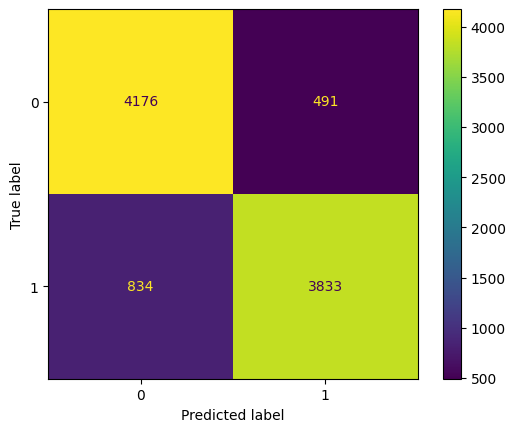

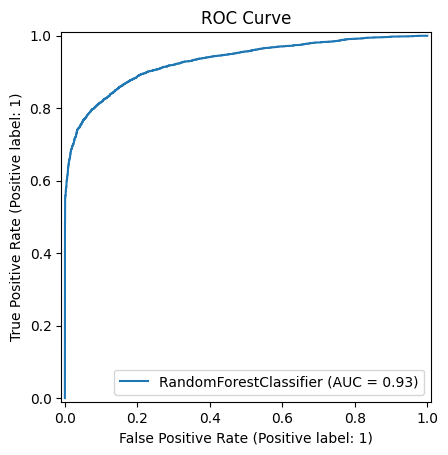

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

best_rf = grid_search.best_estimator_
y_pred_final = best_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# ROC AUC
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC Curve")
plt.show()


## feature Importance

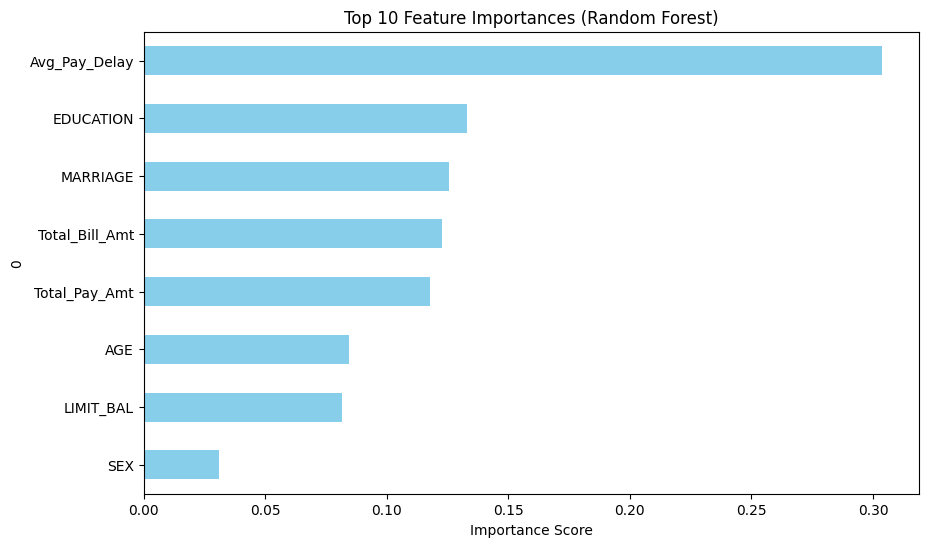

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming best_rf is your trained RandomForest model and X_train is the training feature set
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

# Plot Top 10 features
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


### Save the model

In [44]:
import joblib
joblib.dump(best_rf, "credit_card_default_model.pkl")

['credit_card_default_model.pkl']